<a href="https://www.kaggle.com/code/muhammadmeftahmafazy/classification?scriptVersionId=130018161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mengimpor *Library*

In [90]:
# feature extractoring and preprocessing data
import librosa
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc, plot_roc_curve
from sklearn import metrics
from sklearn.svm import SVC

#Pytorch
import torch

from imblearn.pipeline import Pipeline

import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Other
from IPython.display import Audio
from tqdm import tqdm

# Inisial Dataset

In [91]:
#Panggil Dataset
data = pd.read_csv("/kaggle/input/coughvid-19/dataset/data_mfcc20.csv")
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,00039425-7f3a-42aa-ac13-834aaa2b6b92.wav,0.139969,0.018696,674.048247,633.077371,1492.569987,0.046746,-543.194580,23.291140,-5.756722,...,-4.500146,1.625783,1.260685,-2.012295,-3.513474,1.159493,-1.986305,0.253066,-0.218850,healthy
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav,0.396159,0.096103,1893.712628,1959.544569,3893.884277,0.091266,-283.278900,100.884628,-25.138542,...,-3.762958,-0.859291,1.082193,-8.793042,-6.045949,-1.110546,-7.760149,-6.742644,-5.843204,healthy
2,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.wav,0.510254,0.051697,2971.704706,2179.003267,5611.094157,0.197713,-403.529816,51.936180,-57.342049,...,-15.421830,-0.475396,-1.752456,-1.704078,-6.569310,7.666912,-5.115314,0.086062,-2.389354,healthy
3,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952.wav,0.607174,0.026541,3973.395766,2804.978115,7411.110433,0.208885,-484.353973,19.927711,-21.078667,...,-6.061337,-3.287774,-2.682608,0.506671,-3.474253,-3.524521,-0.414427,-2.337284,-0.564270,healthy
4,00291cce-36a0-4a29-9e2d-c1d96ca17242.wav,0.339656,0.069405,1613.775755,1589.576830,3346.120199,0.102815,-341.375641,56.839970,-8.756017,...,-11.799273,-0.884639,-10.981890,-3.692999,-4.890329,-3.156173,-2.675156,-3.877989,-2.406359,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,fd849b72-f4bf-4852-9bc2-fd9becc9571e.wav,0.465109,0.023180,3434.841711,2463.634573,6485.191761,0.222945,-484.705566,33.242748,-15.395883,...,-7.932102,-0.683084,-10.673941,1.336620,-7.184326,1.437406,-3.725549,-2.574534,-2.723824,COVID-19
1922,fd8d6e46-75de-42b3-a7ef-30d5294b915d.wav,0.393168,0.055388,1773.444025,1560.945769,3457.674154,0.119055,-408.532166,59.978329,-10.850944,...,-7.967178,-2.982839,-6.530432,-1.296964,-1.677289,-4.905485,-1.467191,-3.616300,-4.734675,COVID-19
1923,fdbabb79-c296-4b93-9e02-06b290916fe7.wav,0.414001,0.068556,2015.112976,1905.026398,4034.086100,0.129191,-323.661987,83.604263,-6.631046,...,-8.675909,-6.438833,-4.447913,4.185331,-7.270495,-5.096889,-8.805015,-3.295034,-4.829839,COVID-19
1924,ff8363d2-016d-4738-9499-4c62480886fb.wav,0.566918,0.030452,2259.695312,2279.451379,4890.329997,0.123146,-483.549042,35.037273,3.151123,...,-0.835172,2.066347,-0.869575,0.140731,0.722558,0.600689,-4.130375,-1.082227,-1.810013,COVID-19


In [92]:
#Menghapus kolom nama file
data_new = data.drop('filename', axis=1)
data_new

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.139969,0.018696,674.048247,633.077371,1492.569987,0.046746,-543.194580,23.291140,-5.756722,9.078175,...,-4.500146,1.625783,1.260685,-2.012295,-3.513474,1.159493,-1.986305,0.253066,-0.218850,healthy
1,0.396159,0.096103,1893.712628,1959.544569,3893.884277,0.091266,-283.278900,100.884628,-25.138542,15.990937,...,-3.762958,-0.859291,1.082193,-8.793042,-6.045949,-1.110546,-7.760149,-6.742644,-5.843204,healthy
2,0.510254,0.051697,2971.704706,2179.003267,5611.094157,0.197713,-403.529816,51.936180,-57.342049,16.247116,...,-15.421830,-0.475396,-1.752456,-1.704078,-6.569310,7.666912,-5.115314,0.086062,-2.389354,healthy
3,0.607174,0.026541,3973.395766,2804.978115,7411.110433,0.208885,-484.353973,19.927711,-21.078667,3.570624,...,-6.061337,-3.287774,-2.682608,0.506671,-3.474253,-3.524521,-0.414427,-2.337284,-0.564270,healthy
4,0.339656,0.069405,1613.775755,1589.576830,3346.120199,0.102815,-341.375641,56.839970,-8.756017,12.439443,...,-11.799273,-0.884639,-10.981890,-3.692999,-4.890329,-3.156173,-2.675156,-3.877989,-2.406359,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,0.465109,0.023180,3434.841711,2463.634573,6485.191761,0.222945,-484.705566,33.242748,-15.395883,8.435127,...,-7.932102,-0.683084,-10.673941,1.336620,-7.184326,1.437406,-3.725549,-2.574534,-2.723824,COVID-19
1922,0.393168,0.055388,1773.444025,1560.945769,3457.674154,0.119055,-408.532166,59.978329,-10.850944,12.971819,...,-7.967178,-2.982839,-6.530432,-1.296964,-1.677289,-4.905485,-1.467191,-3.616300,-4.734675,COVID-19
1923,0.414001,0.068556,2015.112976,1905.026398,4034.086100,0.129191,-323.661987,83.604263,-6.631046,9.524685,...,-8.675909,-6.438833,-4.447913,4.185331,-7.270495,-5.096889,-8.805015,-3.295034,-4.829839,COVID-19
1924,0.566918,0.030452,2259.695312,2279.451379,4890.329997,0.123146,-483.549042,35.037273,3.151123,12.327229,...,-0.835172,2.066347,-0.869575,0.140731,0.722558,0.600689,-4.130375,-1.082227,-1.810013,COVID-19


In [93]:
#Mengubah label menjadi numerik
data_new['label'].replace(['healthy', 'COVID-19'], [0,1], inplace=True)

In [94]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel. 
# array ke-16 untuk dataset 10 mfcc
# array ke-26 untuk dataset 20 mfcc
# array ke-36 untuk dataset 30 mfcc
X = data_new[data_new.columns[:26]]

# array ke-24 untuk dataset 10 mfcc
# array ke-34 untuk dataset 20 mfcc
# array ke-44 untuk dataset 30 mfcc
# X = data_new[data_new.columns[:44]]


# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = data_new['label']

# Klasifikasi menggunakan *SVM* dengan Stratified K-Fold

In [95]:
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [96]:
# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Mencari Parameter Terbaik menggunakan algoritma GridSearchCV

In [97]:
# # Loop untuk setiap fold pada data
# for train_index, test_index in skf.split(X, y):
#     # Memisahkan data untuk training dan testing
#     X_train, X_test = X.values[train_index], X.values[test_index]
#     y_train, y_test = y.values[train_index], y.values[test_index]

# # Mencari parameter terbaik menggunakan Grid Search
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
#               'gamma': [0.01, 0.1, 1, 10, 100], 
#               'kernel': ['rbf'],
#              }

# clf = GridSearchCV(SVC(), param_grid, cv=skf, scoring='roc_auc')
# clf.fit(X_train_scaled, y_train)

# # Menampilkan parameter terbaik dan AUC pada data testing
# y_pred = clf.decision_function(X_test_scaled)
# auc = roc_auc_score(y_test, y_pred)

# print("Best parameters: ", clf.best_params_)
# print("AUC on test set: ", auc)

In [98]:
    # Loop untuk setiap fold pada data
    hasil_all = np.zeros_like(actual_class)
    actual_class = data_new['label']
    for train_index, test_index in skf.split(X, y):
        # Memisahkan data untuk training dan testing
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # # Inisialisasi objek SVM
#         clf = SVC(kernel='rbf')
        clf = SVC (kernel='rbf', C=1, gamma='auto', probability=True)
#         clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)

        # Melakukan training pada model SVM
        clf.fit(X_train, y_train)

        # Melakukan prediksi pada data testing
        y_pred = clf.predict(X_test)
        hasil_all[test_index] += y_pred

        # Hitung Probabilitas
        y_prob = clf.decision_function(X_test)
        


In [99]:
# # # Inisialisasi objek SVM
# clf = SVC(kernel='rbf')
# # clf = SVC (kernel='rbf', C=1, gamma='scale', probability=True)
# # clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)   
    
# # Loop untuk setiap fold pada data
# # actual_class = data_new['label']
# hasil_all = 0;


# for train_index, test_index in skf.split(X_scaled, y):
#         # Memisahkan data untuk training dan testing
#         X_train, X_test = X_scaled[train_index], X_scaled[test_index]
#         y_train, y_test = y[train_index], y[test_index]

# #         actual_class = data_new.append(actual_class, y_test)
        
#         # Melakukan training pada model SVM
#         clf.fit(X_train, y_train)

#         # Melakukan prediksi pada data testing
#         hasil = clf.predict(X_test)

#         hasil_all = hasil_all + hasil
        
#         print(hasil)
#         print(hasil_all)
        
#         # Hitung Probabilitas
#         y_prob = clf.decision_function(X_test)
        
#         # Confusion Matrix
#         results = []
    
#         confusion_matrix = metrics.confusion_matrix(hasil_all, y_prob)
# print('Confusion matrix\n\n',  confusion_matrix)

# print('\nTrue Positives(TP) = ',  confusion_matrix[1,1])

# print('\nTrue Negatives(TN) = ',  confusion_matrix[0,0])

# print('\nFalse Positives(FP) = ',  confusion_matrix[0,1])

# print('\nFalse Negatives(FN) = ',  confusion_matrix[1,0])

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()
     
# Accuracy = metrics.accuracy_score(y_test, hasil_all)
# Precision = metrics.precision_score(y_test, hasil_all)
# Sensitivity_recall = metrics.recall_score(y_test, hasil_all)
# Specificity = metrics.recall_score(y_test, hasil_all, pos_label=0)

# #     print(classification_report(y_test, y_pred))
# plot_roc_curve(clf, X_test, y_test)
# plt.show()
    
# # AUC (y_prob[:,1] khusus untuk random forest dan knn)
# auc = roc_auc_score(y_test, y_prob)
    
# # Simpan hasil ke dalam list
# results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
# # Buat dataframe dari hasil
# df = pd.DataFrame(results)

# # Print dataframe
# print(df)

In [100]:
# # Mengetahui jumlah data training dan data testing
print(len(X_train))
print(len(X_test))
print("training",pd.value_counts(y_train))
print("testing",pd.value_counts(y_test))
print(y_pred)

1734
192
training 0    1156
1     578
Name: label, dtype: int64
testing 0    128
1     64
Name: label, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0]


Confusion matrix

 [[1245  569]
 [  39   73]]

True Positives(TP) =  73

True Negatives(TN) =  1245

False Positives(FP) =  569

False Negatives(FN) =  39


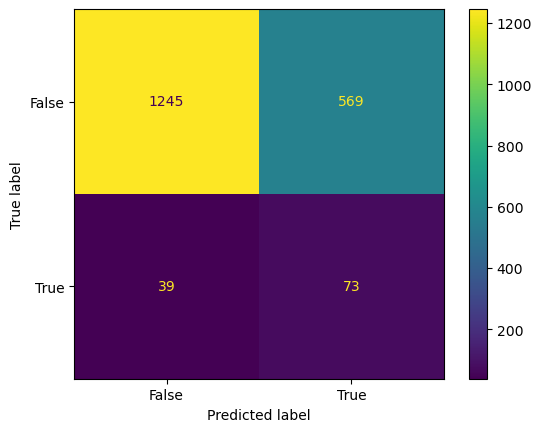

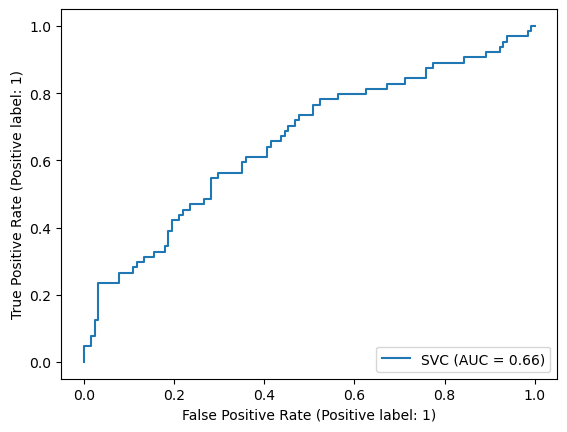

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0   0.68432   0.113707            0.651786     0.686329  0.657104


In [101]:
    # Confusion Matrix
    results = []
    
    confusion_matrix = metrics.confusion_matrix(hasil_all, actual_class)
    print('Confusion matrix\n\n',  confusion_matrix)

    print('\nTrue Positives(TP) = ',  confusion_matrix[1,1])

    print('\nTrue Negatives(TN) = ',  confusion_matrix[0,0])

    print('\nFalse Positives(FP) = ',  confusion_matrix[0,1])

    print('\nFalse Negatives(FN) = ',  confusion_matrix[1,0])

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
     
    Accuracy = metrics.accuracy_score(hasil_all, actual_class)
    Precision = metrics.precision_score(hasil_all, actual_class)
    Sensitivity_recall = metrics.recall_score(hasil_all, actual_class)
    Specificity = metrics.recall_score(hasil_all, actual_class, pos_label=0)

#     print(classification_report(y_test, y_pred))
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
    
    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob)
    
     # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

In [102]:
# Menampilkan Akurasi data training dan data testing
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7376
Test set score: 0.6875


# Confusion Matrix

In [103]:
    # Confusion Matrix
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       128
           1       0.70      0.11      0.19        64

    accuracy                           0.69       192
   macro avg       0.69      0.54      0.50       192
weighted avg       0.69      0.69      0.60       192

